# Cat & Dog Classification using Convolutional Neural Network in Python


## Importing Libraries


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg 


## Importing Dataset 


In [ ]:
# download from kaggle cat and dog

In [14]:
from zipfile import ZipFile

data_path = 'dog-vs-cat.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')


The data set has been extracted.


In [ ]:
# refactor them in appropriate folders for the following tasks.

## Data Visualization

In [13]:
path = 'dog-vs-cat'
classes = os.listdir(path)
classes

['test_set', 'training_set']

In [15]:
path = 'dog-vs-cat/test_set'
classes = os.listdir(path)
classes

['cats', 'dogs']

In [16]:
path = 'dog-vs-cat/training_set'
classes = os.listdir(path)
classes

['cats', 'dogs']

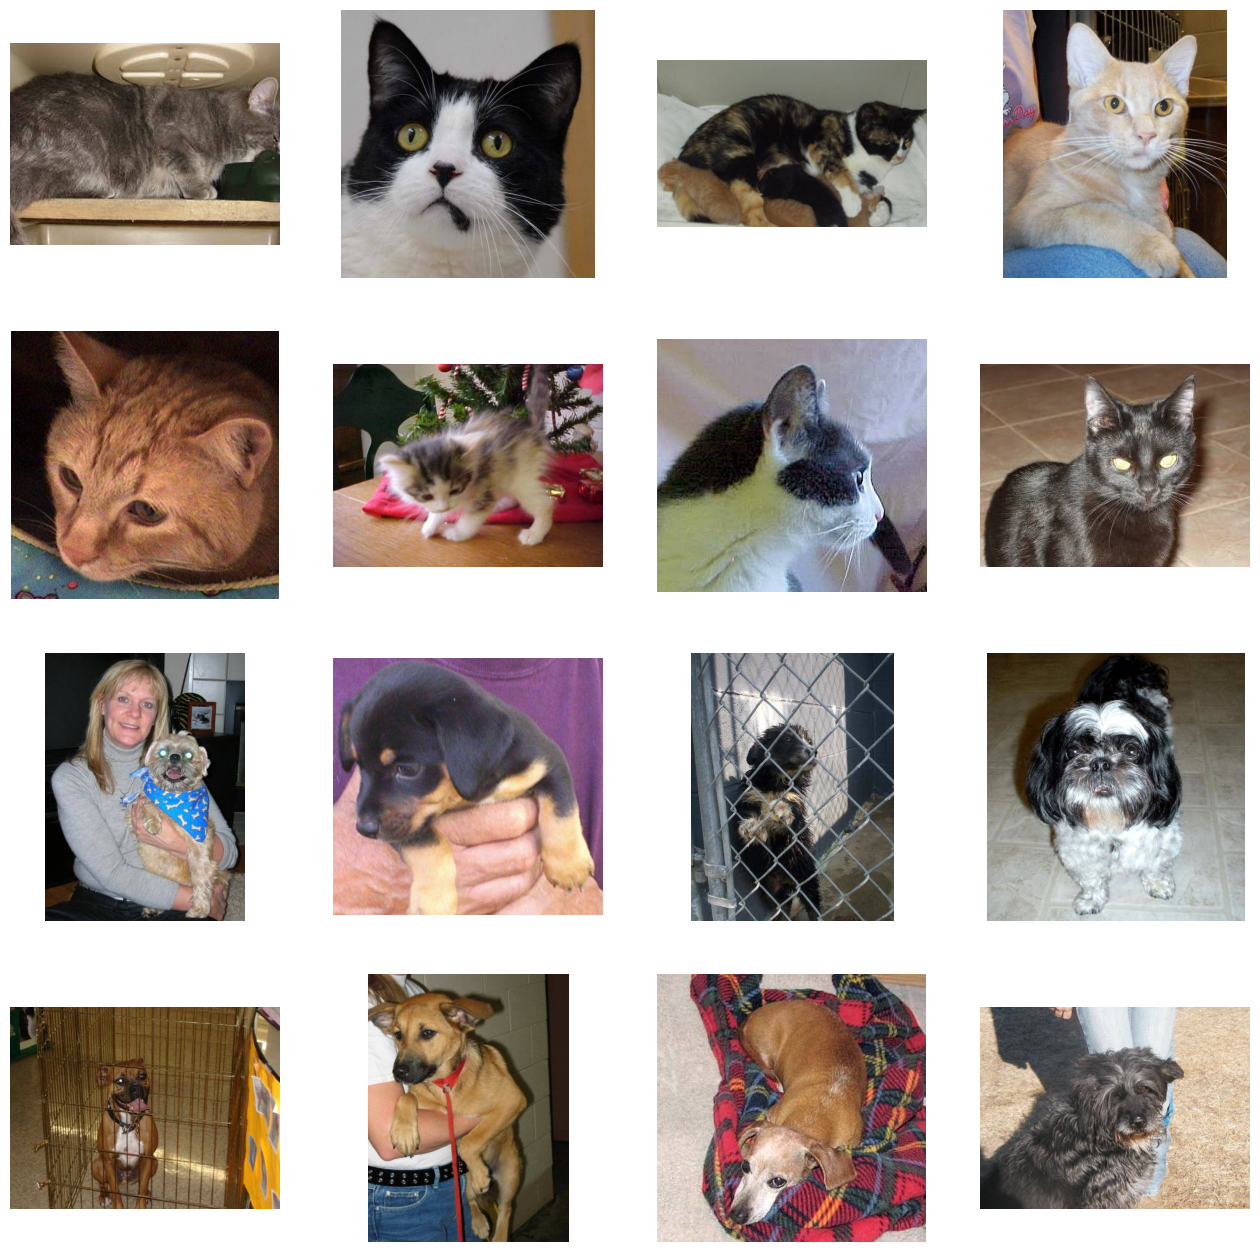

In [17]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dog-vs-cat/training_set/cats')
dog_dir = os.path.join('dog-vs-cat/training_set/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


## Splitting Dataset

In [25]:
#Training data
base_dir = 'dog-vs-cat/training_set'

train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  seed = 1,
                                                  batch_size= 32)

Found 8005 files belonging to 2 classes.


In [26]:
# Validation data
test_base_dir = 'dog-vs-cat/test_set'  

test_datagen = image_dataset_from_directory(
    test_base_dir,
    image_size=(200, 200),
    batch_size=32,
    seed=1
)

Found 2023 files belonging to 2 classes.


## Model Architecture

In [20]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

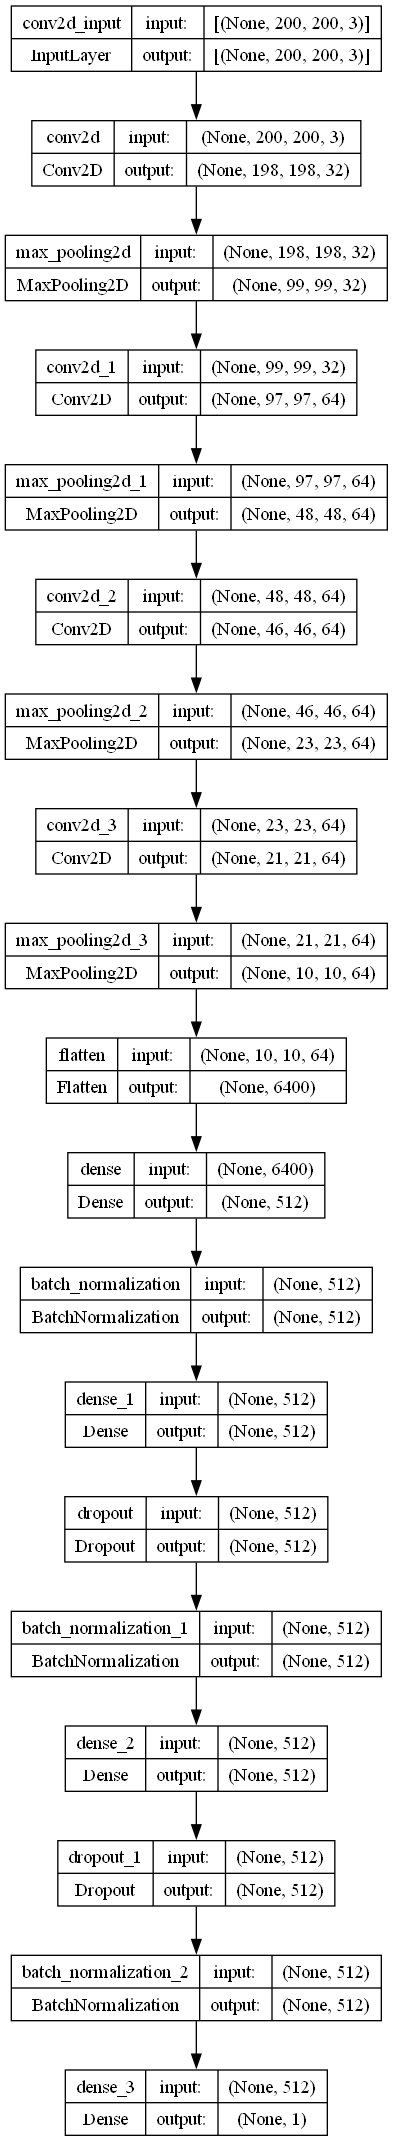

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Assuming your model is named 'model'
plot_model(model, to_file='dog-vs-cat/model_plot.png', show_shapes=True, show_layer_names=True)


 ## Model Compilation & Training

In [40]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Load trained model if exist
model = keras.models.load_model("best_cat_dog_classifier_CNN")

In [ ]:
# WARNING! takes terrifyingly long to load, If model exist you should just load with the command above ^
from keras.callbacks import ModelCheckpoint

checkpointCNN = ModelCheckpoint("best_cat_dog_classifier_CNN", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpointCNN]

history = model.fit(train_datagen,
          epochs=100,
          shuffle=True,
          validation_data=test_datagen,
          callbacks=callbacks_list)


Epoch 1/100
251/251 [==============================] - ETA: 0s - loss: 0.3114 - accuracy: 0.8532
Epoch 1: val_loss improved from inf to 0.75231, saving model to best_cat_dog_classifier_CNN
INFO:tensorflow:Assets written to: best_cat_dog_classifier_CNN\assets


INFO:tensorflow:Assets written to: best_cat_dog_classifier_CNN\assets


251/251 [==============================] - 90s 355ms/step - loss: 0.3114 - accuracy: 0.8532 - val_loss: 0.7523 - val_accuracy: 0.7380
Epoch 2/100
251/251 [==============================] - ETA: 0s - loss: 0.1761 - accuracy: 0.9300
Epoch 2: val_loss did not improve from 0.75231
251/251 [==============================] - 88s 352ms/step - loss: 0.1761 - accuracy: 0.9300 - val_loss: 0.8955 - val_accuracy: 0.7281
Epoch 3/100
251/251 [==============================] - ETA: 0s - loss: 0.2109 - accuracy: 0.9096
Epoch 3: val_loss did not improve from 0.75231
251/251 [==============================] - 88s 352ms/step - loss: 0.2109 - accuracy: 0.9096 - val_loss: 1.4161 - val_accuracy: 0.4978
Epoch 4/100
251/251 [==============================] - ETA: 0s - loss: 0.4890 - accuracy: 0.7537
Epoch 4: val_loss did not improve from 0.75231
251/251 [==============================] - 89s 355ms/step - loss: 0.4890 - accuracy: 0.7537 - val_loss: 0.7932 - val_accuracy: 0.6589
Epoch 5/100
251/251 [===========

## Model Evaluation

In [42]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_datagen, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


64/64 - 4s - loss: 1.4116 - accuracy: 0.7538 - 4s/epoch - 64ms/step
Test Accuracy: 75.38%


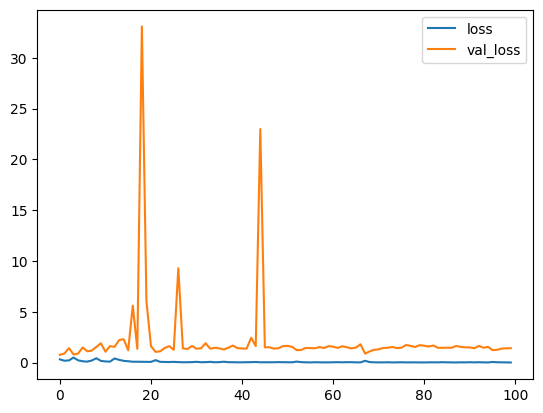

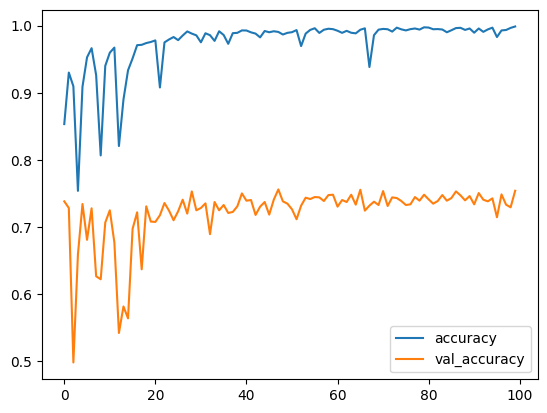

In [43]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


## Model Testing and Prediction

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(200, 200))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")


1/1 [==============================] - 0s 16ms/step
Cat


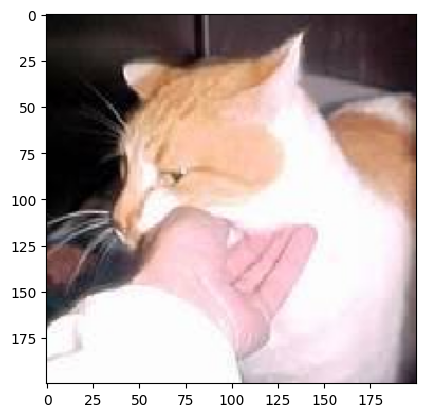

In [55]:
num = random.randint(4001, 5000)

# Test the function
predict_image(f'dog-vs-cat/test_set/cats/cat.{num}.jpg')

1/1 [==============================] - 0s 16ms/step
Dog


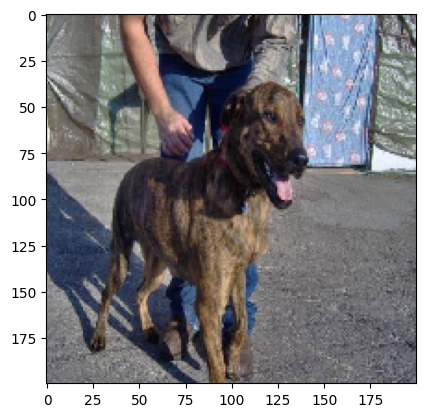

In [54]:
num = random.randint(4001, 5000)

# Test the function
predict_image(f'dog-vs-cat/test_set/dogs/dog.{num}.jpg')